In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import scipy.signal as signal
from scipy import sparse
from scipy.sparse.linalg import spsolve

import plotly.graph_objects as go

from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
API_KEY = "Nc1dTFzE1dg6gchvs0voTKE07XuuXIKW"


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Latin Modern Roman"],  # must be installed on your system
    "mathtext.fontset": "cm",             # Computer Modern math, matches LaTeX style
    "text.usetex": True,                    # render text via LaTeX
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"
})

In [2]:
file_path_900 = r"../Data/XRD/02182026_Ni2Si_900grad_.xy"

data_900 = pd.read_csv(file_path_900, delimiter=" ", skiprows=1, header=None, names=['Angle', 'Intensity'])

filename_900 = os.path.basename(file_path_900)
name_900 = filename_900.split("_", 1)[1].split("grad")[0]
print(name_900)
print(data_900.info())


file_path_800 = r"../Data/XRD/02202026_Ni2Si_800grad_.xy"

data_800 = pd.read_csv(file_path_800, delimiter=" ", skiprows=1, header=None, names=['Angle', 'Intensity'])

filename_800 = os.path.basename(file_path_800)
name_800 = filename_800.split("_", 1)[1].split("grad")[0]
print(name_800)
print(data_800.info())

Ni2Si_900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Angle      3001 non-null   float64
 1   Intensity  3001 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB
None
Ni2Si_800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Angle      6001 non-null   float64
 1   Intensity  6001 non-null   float64
dtypes: float64(2)
memory usage: 93.9 KB
None


In [4]:
from processXRD import process_XRD_data

processed_data_900, peak_angles_900 = process_XRD_data(data_900, roi=False)
processed_data_800, peak_angles_800 = process_XRD_data(data_800, roi=True, roi_start=64.5, roi_end=66.5)

564     31.28
989     39.78
1138    42.76
1194    43.88
1235    44.70
1292    45.84
1480    49.60
1690    53.80
1852    57.04
2089    61.78
2420    68.40
2777    75.54
Name: Angle, dtype: float64
733     27.33
1132    31.32
1281    32.81
1984    39.84
2275    42.75
2386    43.86
2472    44.72
2587    45.87
2965    49.65
3380    53.80
3703    57.03
4701    67.01
4846    68.46
4933    69.33
5557    75.57
5764    77.64
Name: Angle, dtype: float64


c:\Users\Lutz_Laptop\Documents\VS_Code\Master_data\XRD\processXRD.py:17: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  z = spsolve(Z, w*y)
c:\Users\Lutz_Laptop\Documents\VS_Code\Master_data\XRD\processXRD.py:17: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  z = spsolve(Z, w*y)
c:\Users\Lutz_Laptop\Documents\VS_Code\Master_data\XRD\processXRD.py:17: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  z = spsolve(Z, w*y)


In [3]:
final_peaks_900 = {
'$Ni_2Si$': [32.8, 39.82, 42.78, 43.92, 45.86, 53.86], # 43.92
'$NiSi$': [31.28, 49.58, 61.78, 66.98, 75.54], 
'$Ni_3Si_2$': [44.74, 77.58],
'$Ni_{31}Si_{12}$': [57.04, 68.44]
# 'Ni': [44.5]   # 77.62
}

final_peaks_800 = {
'$Ni_2Si$': [27.32, 32.82, 39.84, 42.77, 43.89, 45.87, 49.67, 53.86], # 43.92
'$NiSi$': [31.33, 49.53, 67.01, 75.54], 
'$Ni_3Si_2$': [44.76, 77.62],
'$Ni_{31}Si_{12}$': [57.02, 68.47]
# 'Ni': [44.5]   # 77.62
}

In [49]:
final_peaks = {
'$Ni_2Si$': [27.32, 32.8, 39.82, 42.78, 43.92, 45.86, 53.86], # 43.92
'$NiSi$': [31.28, 49.58, 61.78, 66.98, 75.54], 
'$Ni_3Si_2$': [44.74, 77.58],
'$Ni_{31}Si_{12}$': [57.04, 68.44]
# 'Ni': [44.5]   # 77.62
}

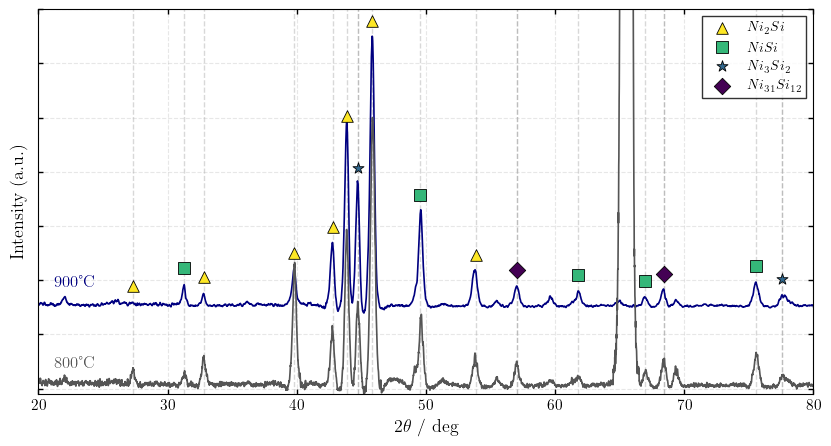

In [ ]:
marker_map = {
    '$NiSi_2$': 'o',  # Circle
    '$NiSi$': 's',   # Square
    '$Ni_2Si$': '^',  # Triangle
    '$Ni_3Si_2$': '*', # Star
    '$Ni_{31}Si_{12}$': 'D'# Diamond
}
# color_map = {
#     'NiSi2': '#00006a', 
#     'NiSi': '#8b0a74',  #8b0a74  7f007b
#     'Ni2Si': '#43a743', 
#     'Ni': '#d8c409'
# }

colors = plt.get_cmap('viridis_r')(np.linspace(0, 1, len(final_peaks_900)))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(processed_data_900['Angle'], processed_data_900['intensity_norm'] + 0.3, color="#000080", lw=1.2, zorder=2) # #D35400   000080

ax.plot(processed_data_800['Angle'], processed_data_800['intensity_norm'], color="#555555", lw=1.2, zorder=2)  # 2980B9 555555

for lable in final_peaks:
    angles = final_peaks[lable]
    ax.scatter(angles, processed_data_900[processed_data_900['Angle'].isin(angles)]['intensity_norm'].values + 0.36, 
                marker=marker_map.get(lable, 'x'),
                color=colors[list(final_peaks.keys()).index(lable) % len(colors)],
                label=lable,
                s=70, edgecolor='black', linewidth=0.6, zorder=5)

ax.tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, 
                width=1.0, labelsize=11)

ax.set_yticklabels([])
ax.set_xlim(20, 80)
ax.set_ylim(-0.02, 1.4)

ax.set_xlabel(r"$2\theta$ / deg", fontsize=13)
ax.set_ylabel(r"Intensity (a.u.)", fontsize=13)

ax.text(0.02, 0.28, '900°C', transform=ax.transAxes, fontsize=12, color='#000080')
ax.text(0.02, 0.07, '800°C', transform=ax.transAxes, fontsize=12, color="#555555")

ax.grid(True, linestyle='--', alpha=0.3, zorder=1)
ax.legend(frameon=True, edgecolor='black', fancybox=False, fontsize=10, loc='upper right')

for angle in [27.32, 32.8, 39.82, 42.78, 43.92, 45.86, 53.86, 31.28, 49.58, 61.78, 66.98, 75.54, 44.74, 77.58, 57.04, 68.44, 44.74, 77.58, 57.04, 68.44]:
    # plt.axvline(x=angle, color='gray', linestyle='--', linewidth=1, alpha=0.3, zorder=0)

plt.savefig(f'../Images/XRD/Ni_2Si_combined.pdf', dpi=500)
plt.show()